In [ ]:
# Movie Data Analysis
# Author: Fatima M
# Purpose: Analyze IMDb movies dataset using Pandas and Matplotlib

In [1]:
# Import required libraries
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# Step 1: Load dataset
url = "https://raw.githubusercontent.com/justmarkham/DAT8/master/data/imdb_1000.csv"
movies = pd.read_csv(url)

# Display first 5 rows
print("First 5 rows of dataset:")
display(movies.head())

First 5 rows of dataset:


,star_rating,title,content_rating,genre,duration,actors_list
0,9.3,The Shawshank Redemption,R,Crime,142,"[u'Tim Robbins', u'Morgan Freeman', u'Bob Gunt..."
1,9.2,The Godfather,R,Crime,175,"[u'Marlon Brando', u'Al Pacino', u'James Caan']"
2,9.1,The Godfather: Part II,R,Crime,200,"[u'Al Pacino', u'Robert De Niro', u'Robert Duv..."
3,9.0,The Dark Knight,PG-13,Action,152,"[u'Christian Bale', u'Heath Ledger', u'Aaron E..."
4,8.9,Pulp Fiction,R,Crime,154,"[u'John Travolta', u'Uma Thurman', u'Samuel L...."


In [3]:
# Step 2: Check for missing values

print("\nMissing values per column:")
print(movies.isnull().sum())

# Optional: drop rows with missing 'star_rating'
movies = movies.dropna(subset=['star_rating'])



Missing values per column:
star_rating       0
title             0
content_rating    3
genre             0
duration          0
actors_list       0
dtype: int64


In [4]:
# Step 3: Basic statistics

print("\nDataset info:")
movies.info()

print("\nStatistical summary of numeric columns:")
print(movies.describe())



Dataset info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 979 entries, 0 to 978
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   star_rating     979 non-null    float64
 1   title           979 non-null    object 
 2   content_rating  976 non-null    object 
 3   genre           979 non-null    object 
 4   duration        979 non-null    int64  
 5   actors_list     979 non-null    object 
dtypes: float64(1), int64(1), object(4)
memory usage: 46.0+ KB

Statistical summary of numeric columns:
       star_rating    duration
count   979.000000  979.000000
mean      7.889785  120.979571
std       0.336069   26.218010
min       7.400000   64.000000
25%       7.600000  102.000000
50%       7.800000  117.000000
75%       8.100000  134.000000
max       9.300000  242.000000


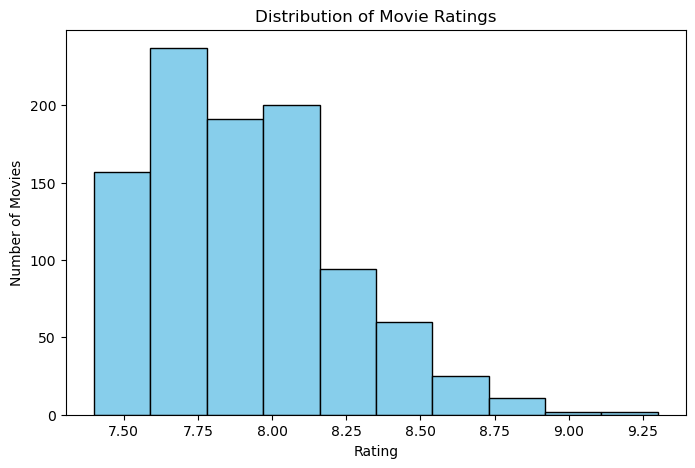

In [5]:
# Step 4: Distribution of movie ratings

plt.figure(figsize=(8,5))
plt.hist(movies['star_rating'], bins=10, color='skyblue', edgecolor='black')
plt.title("Distribution of Movie Ratings")
plt.xlabel("Rating")
plt.ylabel("Number of Movies")
plt.show()

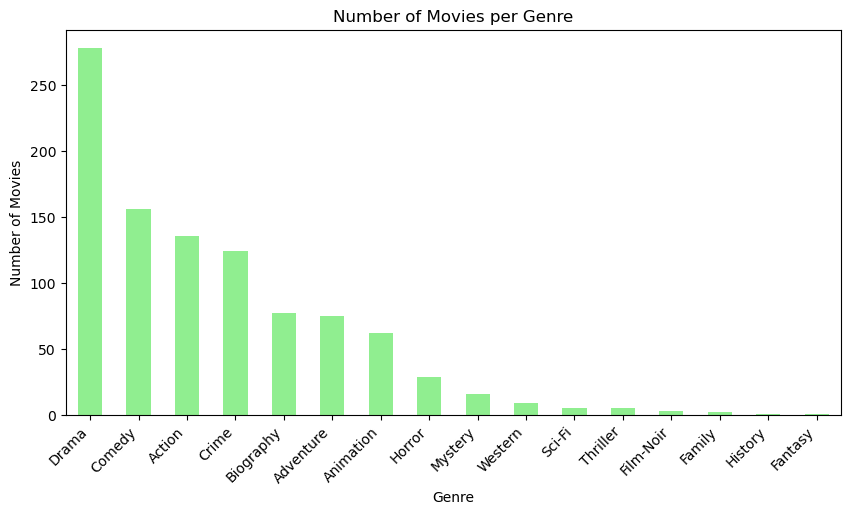

In [6]:
# Step 5: Number of movies per genre

plt.figure(figsize=(10,5))
movies['genre'].value_counts().plot(kind='bar', color='lightgreen')
plt.title("Number of Movies per Genre")
plt.xlabel("Genre")
plt.ylabel("Number of Movies")
plt.xticks(rotation=45, ha='right')
plt.show()


Average rating per genre:
genre
Western      8.255556
Film-Noir    8.033333
History      8.000000
Mystery      7.975000
Adventure    7.933333
Sci-Fi       7.920000
Crime        7.916935
Animation    7.914516
Drama        7.902518
Action       7.884559
Biography    7.862338
Family       7.850000
Comedy       7.822436
Horror       7.806897
Fantasy      7.700000
Thriller     7.680000
Name: star_rating, dtype: float64


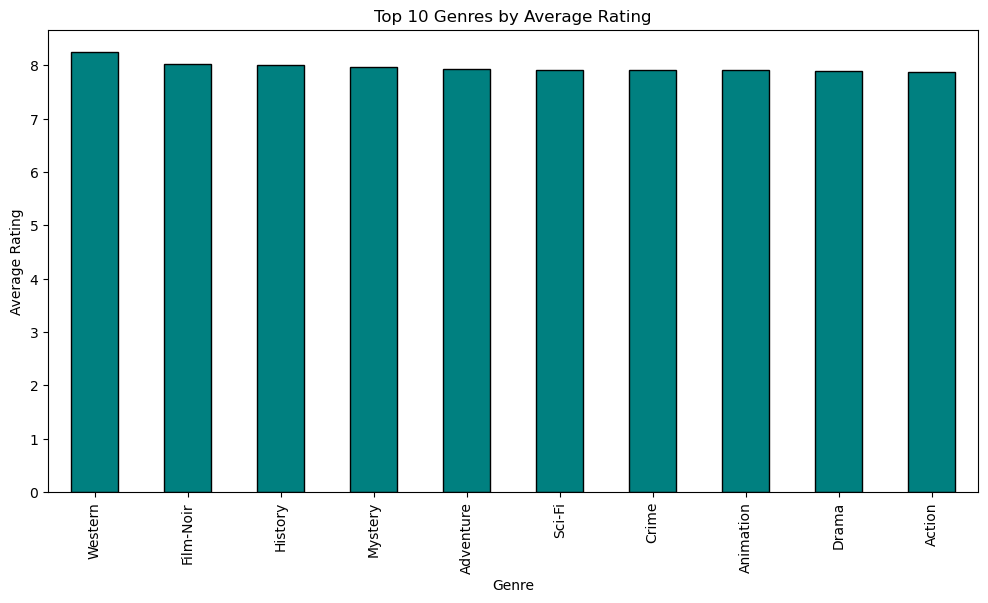

In [7]:
# Step 6: Average rating per genre

genre_rating = movies.groupby('genre')['star_rating'].mean().sort_values(ascending=False)
print("\nAverage rating per genre:")
print(genre_rating)

# Bar chart for top genres
top_genres = genre_rating.head(10)
top_genres.plot(kind='bar', figsize=(12,6), color='teal', edgecolor='black')
plt.title("Top 10 Genres by Average Rating")
plt.xlabel("Genre")
plt.ylabel("Average Rating")
plt.show()


C:\Users\user\AppData\Local\Temp\ipykernel_4404\950524586.py:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  plt.annotate(txt, (top_genres_stats['movie_count'][i], top_genres_stats['star_rating'][i]), rotation=30)


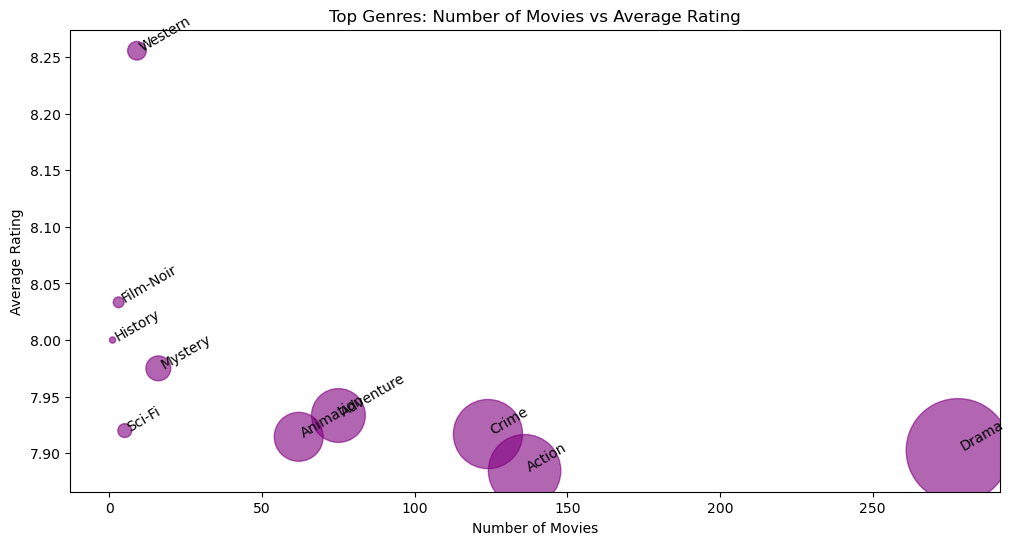

In [8]:
# Step 7: Bubble chart - Number of movies vs Average rating

genre_stats = movies.groupby('genre').agg({'star_rating':'mean','title':'count'}).rename(columns={'title':'movie_count'})
top_genres_stats = genre_stats.sort_values('star_rating', ascending=False).head(10)

plt.figure(figsize=(12,6))
plt.scatter(top_genres_stats['movie_count'], top_genres_stats['star_rating'], 
            s=top_genres_stats['movie_count']*20, alpha=0.6, color='purple')
for i, txt in enumerate(top_genres_stats.index):
    plt.annotate(txt, (top_genres_stats['movie_count'][i], top_genres_stats['star_rating'][i]), rotation=30)
plt.xlabel("Number of Movies")
plt.ylabel("Average Rating")
plt.title("Top Genres: Number of Movies vs Average Rating")
plt.show()

In [9]:
import os, datetime
p = "movie_analysis.ipynb"
print("cwd:", os.getcwd())
print("last modified:", datetime.datetime.fromtimestamp(os.path.getmtime(p)))


cwd: C:\Users\user
last modified: 2025-10-08 10:00:00.395788
